# Datensatz einlesen

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import dirname
import datetime as dt
from random import randint

notebook_path = os.path.abspath("Notebook_Cedrik_Datenexploration.ipynb")
csv_path = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-numpy-pandas.csv")

In [25]:
df = pd.read_csv (csv_path, low_memory=False)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,56


# Anforderungen an Projektumsetzung: Datenexploration

1. Erstellen Sie jeweils eine Visualisierung zu jedem der folgenden Charttypen. Beschreiben Sie textuell was Sie in dem Chart sehen und ggfs. eine Interpretation:
    - Line-Chart
    - Bar-Chart
    - Histogramm
    - Box-Plot
    - Scatter-Plot


2. Sortieren Sie den Datensatz entweder dauerhaft oder für eine bestimmte Analyse - warum ist diese Sortierung sinnvoll?
3. Erstellen Sie eine statistische Zusammenfassung von mindestens 1 Spalte
4. Führen Sie mindestens eine Gruppierung durch - warum war diese sinnvoll?
5. Dokumentieren Sie jeweils mindestens eine Erkenntnis bzgl. Datenstruktur, Daten und geschäftliche Domäne

### Line Chart

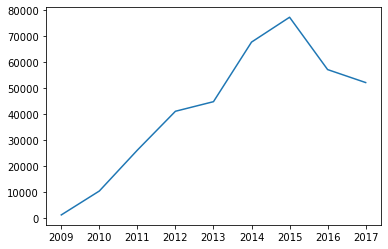

In [26]:
# Get all launch years
df['launched'] = pd.to_datetime(df['launched'])
launchYears = df['launched'].dt.year.unique()
launchYears = np.sort(launchYears) 
launchYears = np.delete(launchYears, [0,10])
launchesPerYearArray = []

for year in launchYears:
    
    launchedProjects = df[df['launched'].dt.year == year]
    numberOflaunchedProjects = launchedProjects.shape[0]
    launchesPerYearArray.append(numberOflaunchedProjects)

launchesPerYearNpArray = np.array(launchesPerYearArray)
plt.plot(launchYears, launchesPerYearNpArray)

### Scatter-Plot

In [27]:
df_filtered = df[df['main_category'] == 'Technology']

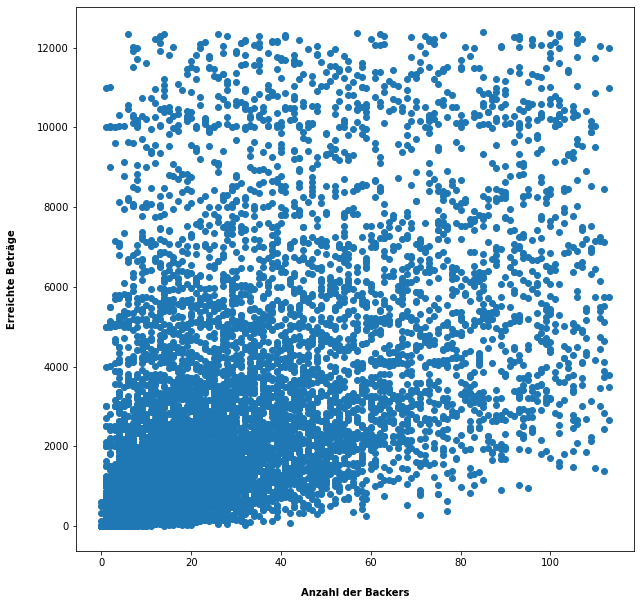

In [28]:
Q1p = df_filtered['pledged'].quantile(0.25)
Q2p = df_filtered['pledged'].quantile(0.75)
upper_threshold_p = Q2p + 1.5 * (Q2p - Q1p)

Q1b = df_filtered['backers'].quantile(0.25)
Q2b = df_filtered['backers'].quantile(0.75)
upper_threshold_b = Q2b + 1.5 * (Q2b - Q1b)

df_threshold = df_filtered[(df_filtered['pledged'] <= upper_threshold_p) & (df_filtered['backers'] <= upper_threshold_b)]
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df_threshold['backers'], df_threshold['pledged'])
plt.xlabel('Anzahl der Backers', fontweight="bold", labelpad=20)
plt.ylabel("Erreichte Beträge", fontweight="bold", labelpad=20)
plt.show()

### Blox-Plot

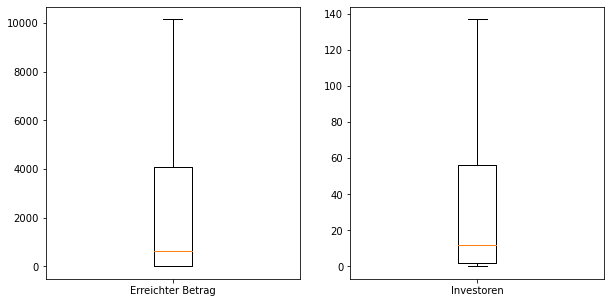

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].boxplot(df['pledged'], labels=['Erreichter Betrag'], showfliers=False)
ax[1].boxplot(df['backers'], labels=['Investoren'], showfliers=False)
plt.show()

### Pie-Chart

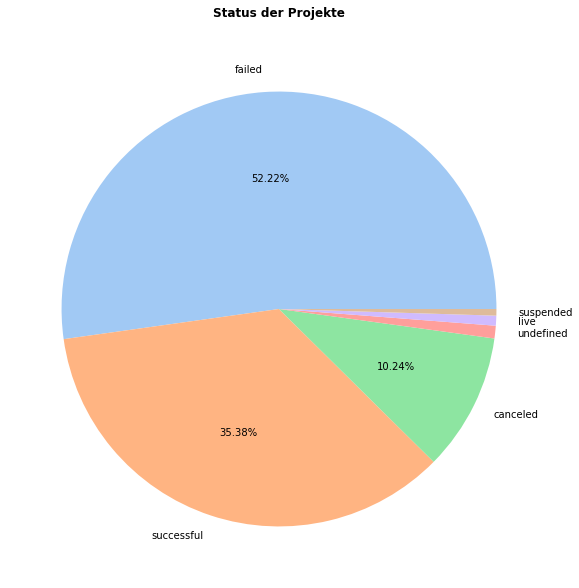

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
colors = sns.color_palette('pastel')[0:6]

def my_autopct(pct):
    return ('%.2f%%' % pct) if pct >= 10 else ''
#create pie chart
plt.pie(df['state'].value_counts(), labels= df['state'].value_counts().index.tolist(),colors = colors, autopct=my_autopct)
plt.title("Status der Projekte", fontweight="bold", fontsize=12, pad=20)
#plt.title("States of the projects", fontweight="bold", fontsize=12, pad=20)
plt.savefig(os.path.join(os.path.dirname(dirname(notebook_path)), "pictures/piechart-succ.png"))
plt.show()

In [31]:
pd.options.mode.chained_assignment = None  # default='warn'
df_pivot_state = df.pivot_table(index='main_category', columns='state', values='name', margins=True, aggfunc='count',
                                fill_value=0.0)
df_pivot_state = df_pivot_state.sort_values(by='All', ascending=False)
df_pivot_state

state,canceled,failed,live,successful,suspended,undefined,All
main_category,,,,,,,
All,38779,197716,2799,133956,1845,3562,378657
Film & Video,5755,32903,332,23623,117,854,63584
Music,3305,21752,281,24197,149,2234,51918
Publishing,3602,23145,299,12300,66,462,39874
Games,6202,16002,287,12518,220,1,35230
Technology,4715,20616,377,6434,424,3,32569
Design,4152,14814,305,10550,246,2,30069
Art,2222,14130,194,11510,96,0,28152
Food,2211,15969,184,6085,153,0,24602


In [32]:
y = 0
sum_categories = []
for i in range(6):
    for x in range(15):
        if x <= 14:
            sum_categories.append(df_pivot_state['All'].values[x+1])
print(sum_categories)        



[63584, 51918, 39874, 35230, 32569, 30069, 28152, 24602, 22816, 10913, 10819, 10779, 8809, 4755, 3768, 63584, 51918, 39874, 35230, 32569, 30069, 28152, 24602, 22816, 10913, 10819, 10779, 8809, 4755, 3768, 63584, 51918, 39874, 35230, 32569, 30069, 28152, 24602, 22816, 10913, 10819, 10779, 8809, 4755, 3768, 63584, 51918, 39874, 35230, 32569, 30069, 28152, 24602, 22816, 10913, 10819, 10779, 8809, 4755, 3768, 63584, 51918, 39874, 35230, 32569, 30069, 28152, 24602, 22816, 10913, 10819, 10779, 8809, 4755, 3768, 63584, 51918, 39874, 35230, 32569, 30069, 28152, 24602, 22816, 10913, 10819, 10779, 8809, 4755, 3768]


In [33]:
#df_pivot_state = df_pivot_state.div( df_pivot_state.iloc[:,-1], axis=0)
df_pivot_state = df_pivot_state.drop(index='All', columns='All')
#df_pivot_state = round(df_pivot_state*100, 2)
#df_pivot_state

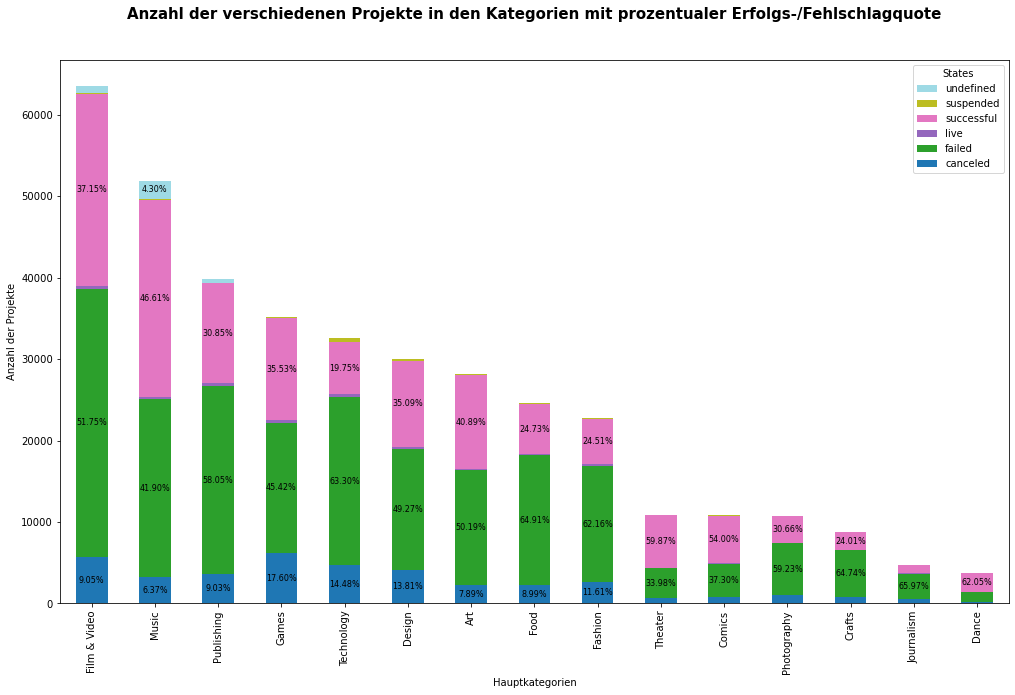

In [34]:
ax = df_pivot_state.plot.bar(stacked=True, colormap='tab20', figsize=(17,10))
i = 0
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can be used as the label
    percentage = (height/sum_categories[i])*100
    i += 1
    label_text = f'{percentage:.2f}%'  # f'{height:.2f}' to format decimal values
   
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 2000:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='States', loc='upper right')
plt.ylabel("Anzahl der Projekte")
#plt.ylabel("Number of projects")
plt.xlabel("Hauptkategorien")
#plt.xlabel("Main categories")
plt.title("Anzahl der verschiedenen Projekte in den Kategorien mit prozentualer Erfolgs-/Fehlschlagquote\n\n", fontsize=15, weight="bold")
#plt.title("Number of projects for the main categories with percentage of successful and failed projects\n\n", fontsize=15, weight="bold")
plt.savefig(os.path.join(os.path.dirname(dirname(notebook_path)), "pictures/succ-category.png"),bbox_inches = "tight")
plt.show()

In [35]:
pd.options.mode.chained_assignment = None  # default='warn'
df_2017 = df
df_2017['launched'] = pd.to_datetime(df_2017['launched'])
df_2017['year'] = df_2017['launched'].dt.year
df_2017= df_2017[df_2017['year'] == 2017]

In [36]:
pd.options.mode.chained_assignment = None  # default='warn'
df_pivot_state_2017 = df_2017.pivot_table(index='main_category', columns='state', values='name', margins=True, aggfunc='count', fill_value=0.0)
df_pivot_state_2017 = df_pivot_state_2017.sort_values(by='All', ascending=False)

In [37]:
y = 0
sum_categories_2017 = []
for i in range(6):
    for x in range(15):
        if x <= 14:
            sum_categories_2017.append(df_pivot_state_2017['All'].values[x+1])

In [38]:
#df_pivot_state = df_pivot_state.div( df_pivot_state.iloc[:,-1], axis=0)
df_pivot_state_2017 = df_pivot_state_2017.drop(index='All', columns='All')
#df_pivot_state = round(df_pivot_state*100, 2)
#df_pivot_state

Text(0.5, 1.0, 'Anzahl der verschiedenen Projekte in den Kategorien mit prozentualer Erfolgs-/Fehlschlagquote 2017\n\n')

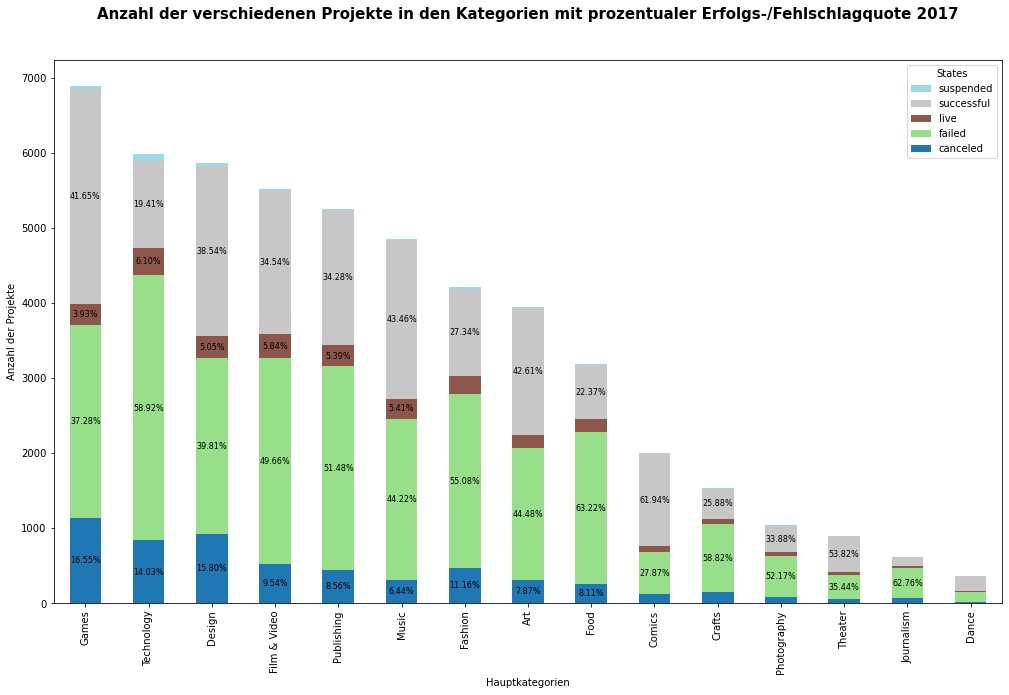

In [39]:
ax = df_pivot_state_2017.plot.bar(stacked=True, colormap='tab20', figsize=(17,10))
i = 0
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can be used as the label
    percentage = (height/sum_categories_2017[i])*100
    i += 1
    label_text = f'{percentage:.2f}%'  # f'{height:.2f}' to format decimal values
   
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 250:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='States', loc='upper right')
plt.ylabel("Anzahl der Projekte")
plt.xlabel("Hauptkategorien")
plt.title("Anzahl der verschiedenen Projekte in den Kategorien mit prozentualer Erfolgs-/Fehlschlagquote 2017\n\n", fontsize=15, weight="bold")

### Histogram

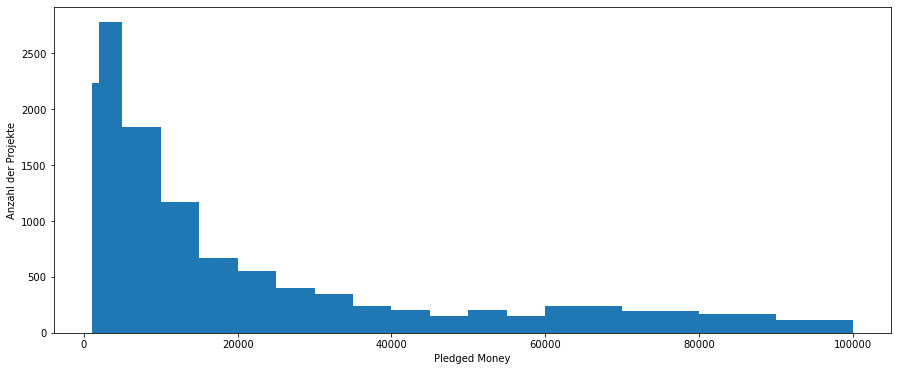

In [40]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Pledged Money')
ax.set_ylabel('Anzahl der Projekte')
ax.hist(df_filtered['pledged'], bins=[1000, 2000, 5000, 10000, 15000, 20000,25000,30000,35000,40000,45000,50000,55000,60000,70000,80000,90000,100000])
plt.show()

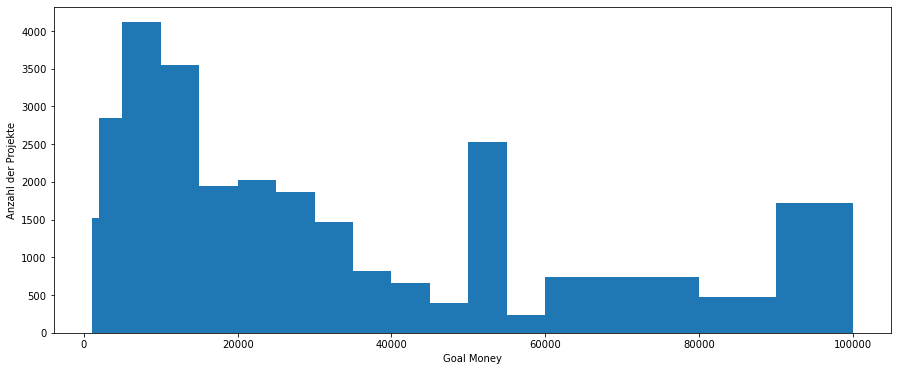

In [41]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Goal Money')
ax.set_ylabel('Anzahl der Projekte')
ax.hist(df_filtered['goal'], bins=[1000, 2000, 5000, 10000, 15000, 20000,25000,30000,35000,40000,45000,50000,55000,60000,70000,80000,90000,100000])
plt.show()

In [42]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration,year
count,378661.00000,378661.00000,378661.00000,378661.00000,374864.00000,378661.00000,378661.00000,378661.00000,378661.00000
mean,1074731191.98876,49080.79152,9682.97934,105.61748,7036.72887,9058.92407,45454.40147,34.48110,2014.24783
std,619086204.32263,1183391.25909,95636.01000,907.18503,78639.74531,90973.34311,1152950.05509,65.90917,1.93329
min,5971.00000,0.01000,0.00000,0.00000,0.00000,0.00000,0.01000,1.00000,1970.00000
25%,538263516.00000,2000.00000,30.00000,2.00000,16.98000,31.00000,2000.00000,30.00000,2013.00000
50%,1075275634.00000,5200.00000,620.00000,12.00000,394.72000,624.33000,5500.00000,30.00000,2014.00000
75%,1610148624.00000,16000.00000,4076.00000,56.00000,3034.09000,4050.00000,15500.00000,37.00000,2016.00000
max,2147476221.00000,100000000.00000,20338986.27000,219382.00000,20338986.27000,20338986.27000,166361390.71000,16739.00000,2018.00000


### Scatter Plot

In [43]:
df_grouped_avg = df.groupby('main_category',as_index=False).mean()
df_grouped_avg

,main_category,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration,year
0,Art,1.077788e+09,40829.180144,3606.970044,42.205094,2534.057110,3220.986968,39198.575879,33.136327,2014.098249
1,Comics,1.063611e+09,20243.646297,6899.311189,134.771236,5344.016859,6610.443828,19571.430669,34.156854,2014.462612
2,Crafts,1.078527e+09,11592.285901,2016.153947,27.283687,1179.190619,1632.907282,10434.466228,31.590078,2015.025088
3,Dance,1.075450e+09,10321.331290,3690.798684,42.801221,2962.990149,3452.946356,9588.328548,33.102176,2013.755042
4,Design,1.078300e+09,46733.630260,27119.751279,241.299634,17033.026574,24417.034698,41871.388591,34.982208,2014.853176
5,Fashion,1.069690e+09,24818.246005,6549.031814,61.447800,4279.731233,5712.450839,22412.409361,32.856548,2014.781995
6,Film & Video,1.074967e+09,84334.009667,6362.733853,66.015208,5532.577810,6157.978427,82625.292254,35.748746,2013.557632
7,Food,1.081894e+09,48693.745411,5340.163268,54.172466,4209.934253,5113.669716,49039.620804,34.078408,2014.584952
8,Games,1.072129e+09,50711.298323,21865.173174,321.785615,16306.194882,21041.903140,44923.741408,32.553660,2014.818200
9,Journalism,1.076352e+09,88783.576925,3218.085216,38.294637,2156.545440,2615.702568,86003.395014,34.576025,2014.589905


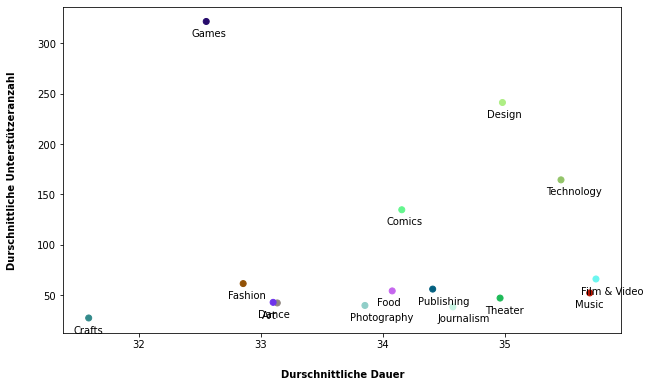

In [65]:
colors = []
for i in range(df_grouped_avg['duration'].size):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_grouped_avg['duration'], df_grouped_avg['backers'], c=colors)
plt.xlabel('Durschnittliche Dauer', fontweight="bold", labelpad=20)
#plt.xlabel('Average duration', fontweight="bold", labelpad=20)
plt.ylabel("Durschnittliche Unterstützeranzahl", fontweight="bold", labelpad=20)
#plt.ylabel("Average goal", fontweight="bold", labelpad=20)

for key, row in df_grouped_avg.iterrows():
    ax.annotate(row['main_category'], xy=(row['duration'], row['backers']), xycoords='data',
            xytext=(-15, -15), textcoords='offset points', size=10)

plt.show()

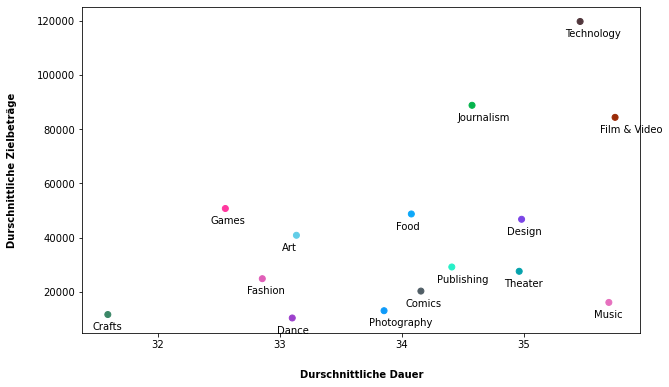

In [61]:
colors = []
for i in range(df_grouped_avg['duration'].size):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_grouped_avg['duration'], df_grouped_avg['goal'], c=colors)
plt.xlabel('Durschnittliche Dauer', fontweight="bold", labelpad=20)
#plt.xlabel('Average duration', fontweight="bold", labelpad=20)
plt.ylabel("Durschnittliche Zielbeträge", fontweight="bold", labelpad=20)
#plt.ylabel("Average goal", fontweight="bold", labelpad=20)

for key, row in df_grouped_avg.iterrows():
    ax.annotate(row['main_category'], xy=(row['duration'], row['goal']), xycoords='data',
            xytext=(-15, -15), textcoords='offset points', size=10)

plt.savefig(os.path.join(os.path.dirname(dirname(notebook_path)), "pictures/scatter.png"),bbox_inches = "tight")    
plt.show()

In [46]:
pd.options.mode.chained_assignment = None  # default='warn'
df_successful = df[df['state'] == 'successful']
df_successful['launched'] = pd.to_datetime(df_successful['launched'])
df_successful['year'] = df_successful['launched'].dt.year
df_pivot_years = df_successful.pivot_table(index='year', columns='main_category', values='state'
                                           , margins=True, aggfunc='count', fill_value=0.0)
df_pivot_years

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,All
year,,,,,,,,,,,,,,,,
2009,77,12,4,3,8,4,124,17,23,20,157,31,57,19,23,579
2010,382,110,19,108,69,43,1473,120,70,68,1295,190,222,65,359,4593
2011,1189,268,46,299,302,186,3317,258,284,67,3763,331,758,140,963,12171
2012,1694,548,126,368,760,435,3771,682,941,88,4944,407,1639,325,1164,17892
2013,1684,753,213,388,1255,776,4029,947,1490,81,3770,443,1951,672,963,19415
2014,1783,820,381,413,1718,978,3599,1385,1984,172,3127,543,2050,1143,1011,21107
2015,1707,994,526,293,2046,1094,3004,1171,2263,248,2611,539,1973,1601,901,20971
2016,1311,1097,401,262,2131,926,2402,791,2592,145,2419,469,1849,1307,664,18766
2017,1683,1240,399,204,2261,1151,1904,714,2871,123,2111,352,1801,1162,486,18462


In [47]:
df_pivot_years = df_pivot_years.div( df_pivot_years.iloc[:,-1], axis=0)
df_pivot_years = df_pivot_years.drop(index='All', columns='All')
df_pivot_years = round(df_pivot_years*100, 2)
df_pivot_years

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
year,,,,,,,,,,,,,,,
2009,13.30,2.07,0.69,0.52,1.38,0.69,21.42,2.94,3.97,3.45,27.12,5.35,9.84,3.28,3.97
2010,8.32,2.39,0.41,2.35,1.50,0.94,32.07,2.61,1.52,1.48,28.20,4.14,4.83,1.42,7.82
2011,9.77,2.20,0.38,2.46,2.48,1.53,27.25,2.12,2.33,0.55,30.92,2.72,6.23,1.15,7.91
2012,9.47,3.06,0.70,2.06,4.25,2.43,21.08,3.81,5.26,0.49,27.63,2.27,9.16,1.82,6.51
2013,8.67,3.88,1.10,2.00,6.46,4.00,20.75,4.88,7.67,0.42,19.42,2.28,10.05,3.46,4.96
2014,8.45,3.88,1.81,1.96,8.14,4.63,17.05,6.56,9.40,0.81,14.81,2.57,9.71,5.42,4.79
2015,8.14,4.74,2.51,1.40,9.76,5.22,14.32,5.58,10.79,1.18,12.45,2.57,9.41,7.63,4.30
2016,6.99,5.85,2.14,1.40,11.36,4.93,12.80,4.22,13.81,0.77,12.89,2.50,9.85,6.96,3.54
2017,9.12,6.72,2.16,1.10,12.25,6.23,10.31,3.87,15.55,0.67,11.43,1.91,9.76,6.29,2.63


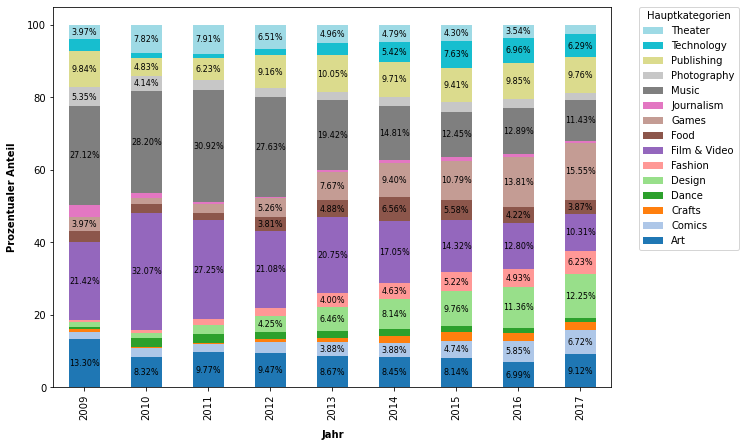

In [52]:
ax = df_pivot_years.plot.bar(stacked=True, colormap='tab20', figsize=(10,7))

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}%'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 3.50:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

handles, labels = ax.get_legend_handles_labels()
#plt.title("Percentage share of the main categories per year\n\n", fontsize=15, weight="bold")
ax.legend(handles[::-1], labels[::-1], title='Hauptkategorien', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel("Prozentualer Anteil", fontweight="bold", labelpad=10)
plt.xlabel("Jahr", fontweight="bold", labelpad=10)
plt.savefig(os.path.join(os.path.dirname(dirname(notebook_path)), "pictures/category_perYear.png"),bbox_inches = "tight")
plt.show()

In [54]:
# Nähere Betrachtung der Top 4 Kategorien Games, Design, Music und Publishing

df_successful_top = df_successful[(df_successful['main_category'] == "Games") | (df_successful['main_category'] == "Design") 
                                | (df_successful['main_category'] == "Music") 
                                | (df_successful['main_category'] == "Film & Video")]
df_successful_games = df_successful[(df_successful['main_category'] == "Games")]
df_successful_design = df_successful[(df_successful['main_category'] == "Design")]
df_successful_music = df_successful[(df_successful['main_category'] == "Music")]
df_successful_filmandvideo = df_successful[(df_successful['main_category'] == "Film & Video")]

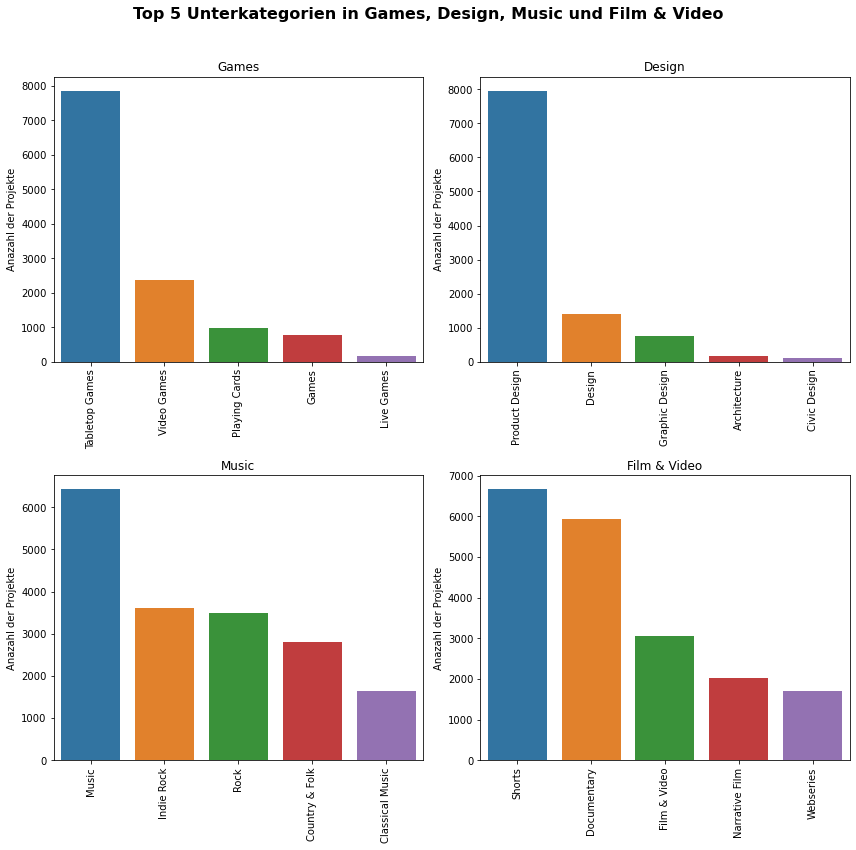

In [56]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
ax1 = sns.countplot(x='category', data=df_successful_games,ax=axs[0,0], order = df_successful_games['category'].value_counts().iloc[:5].index)
ax1.set_title('Games')
ax1.set_xlabel('')
ax1.set_ylabel('Anazahl der Projekte')

ax2 = sns.countplot(x='category', data=df_successful_design,ax=axs[0,1], order = df_successful_design['category'].value_counts().iloc[:5].index)
ax2.set_title('Design')
ax2.set_xlabel('')
ax2.set_ylabel('Anazahl der Projekte')

ax3 = sns.countplot(x='category', data=df_successful_music,ax=axs[1,0], order = df_successful_music['category'].value_counts().iloc[:5].index)
ax3.set_title('Music')
ax3.set_xlabel('')
ax3.set_ylabel('Anazahl der Projekte')

ax4 = sns.countplot(x='category', data=df_successful_filmandvideo,ax=axs[1,1], order = df_successful_filmandvideo['category'].value_counts().iloc[:5].index)
ax4.set_title('Film & Video')
ax4.set_xlabel('')
ax4.set_ylabel('Anazahl der Projekte')

for j in range(2):
     for i in range(2):
        axs[i][j].tick_params(axis='x', rotation=90)
        
plt.suptitle("Top 5 Unterkategorien in Games, Design, Music und Film & Video\n\n", size=16, weight="bold")
#plt.suptitle("Top 5 subcategories in Games, Design, Music and Film & Video\n\n", size=16, weight="bold")
plt.tight_layout()        
plt.savefig(os.path.join(os.path.dirname(dirname(notebook_path)), "pictures/unterkategorie.png"))
plt.show()

In [66]:
df_grouped_main = df.groupby("main_category", as_index=False).agg({'ID': 'count', 'usd_goal_real' : 'sum',
                                                                   'backers' : 'sum' , 'usd_pledged_real' : 'sum'})
per_backer = []
goal_per_project = []
pledged_per_project = []
for index, row in df_grouped_main.iterrows():
    goal_per_project.append(round(row['usd_goal_real']/row['ID'],2))
    per_backer.append(round(row['usd_pledged_real']/row['backers'],2))
    pledged_per_project.append(round(row['usd_pledged_real']/row['ID'],2))

df_grouped_main['per_backer'] = per_backer    
df_grouped_main['goal_per_project'] = goal_per_project
df_grouped_main['pledged_per_project'] = pledged_per_project

df_grouped_main = df_grouped_main.sort_values('per_backer', ascending=False)   
df_grouped_main

,main_category,ID,usd_goal_real,backers,usd_pledged_real,per_backer,goal_per_project,pledged_per_project
13,Technology,32569,3.331436e+09,5356513,6.888725e+08,128.60,102288.54,21151.17
4,Design,30070,1.259073e+09,7255880,7.342202e+08,101.19,41871.39,24417.03
7,Food,24602,1.206473e+09,1332751,1.258065e+08,94.40,49039.62,5113.67
6,Film & Video,63585,5.253729e+09,4197577,3.915551e+08,93.28,82625.29,6157.98
5,Fashion,22816,5.113615e+08,1401993,1.303353e+08,92.96,22412.41,5712.45
11,Photography,10779,1.322243e+08,428078,3.850161e+07,89.94,12266.84,3571.91
14,Theater,10913,2.956149e+08,513536,4.371658e+07,85.13,27088.32,4005.92
3,Dance,3768,3.612882e+07,161275,1.301070e+07,80.67,9588.33,3452.95
0,Art,28153,1.103558e+09,1188200,9.068045e+07,76.32,39198.58,3220.99
10,Music,51918,7.980919e+08,2708475,2.003187e+08,73.96,15372.16,3858.37


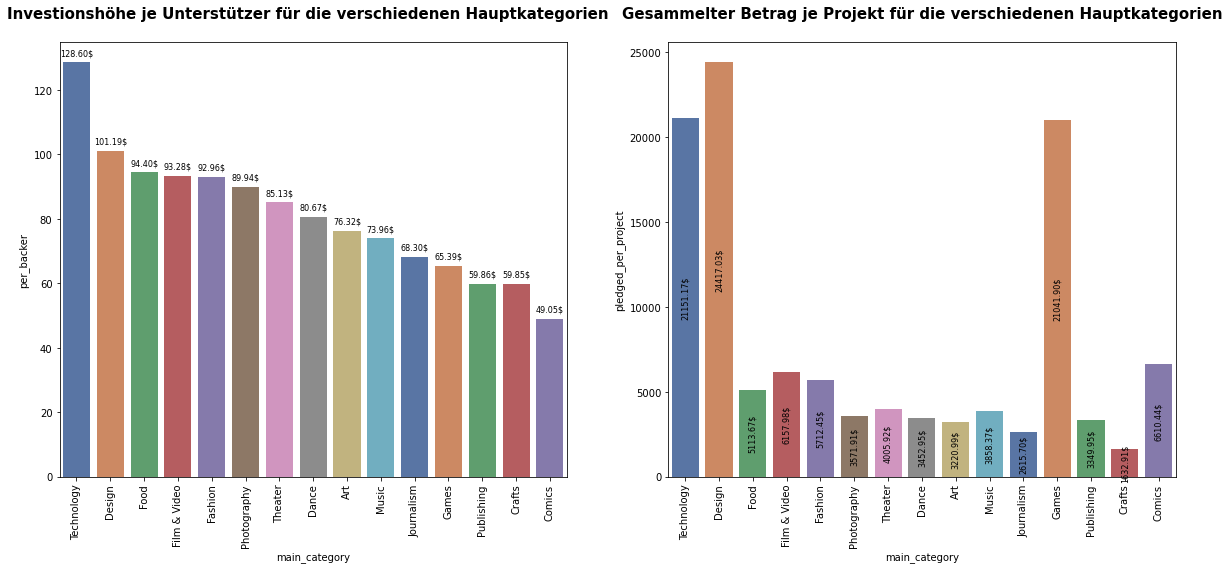

In [71]:
fig, axs = plt.subplots(ncols = 2, figsize=(20,8))
sns.barplot(x = 'main_category', y = 'per_backer', data = df_grouped_main, palette = "deep", ax=axs[0])
sns.barplot(x = 'main_category', y = 'pledged_per_project', data = df_grouped_main, palette = "deep", ax=axs[1])
axs[0].set_title('Investionshöhe je Unterstützer für die verschiedenen Hauptkategorien  \n', fontsize=15, weight="bold")
axs[1].set_title('Gesammelter Betrag je Projekt für die verschiedenen Hauptkategorien\n', fontsize=15, weight="bold")

for i in range(2):
    axs[i].tick_params(axis='x', rotation=90) 
    for rect in axs[i].patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        # The height of the bar is the data value and can be used as the label
        label_text = f'{height:.2f}$'  # f'{height:.2f}' to format decimal values

        # plot only when height is greater than specified value
        if i == 0:
            label_x = x + width / 2
            label_y = y + height + 3
            axs[i].text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
        else:
            label_x = x + width / 2
            label_y = y + height / 2
            axs[i].text(label_x, label_y, label_text, ha='center', va='center', fontsize=8, rotation = 90)

plt.savefig(os.path.join(os.path.dirname(dirname(notebook_path)), "pictures/perbackermoney.png"))            
plt.show()

In [29]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,59,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,60,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,45,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,30,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,56,2015


In [30]:
df.to_csv(os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-datenexploration.csv"),index=False)